# Hey sweetheart!
## Let's segment some Stuff!


#### For a smooth ride, use a kernel from a nice clean virtualenv with (the right) TF and other dependencies installed: 

1. Edit ```requirements``` to have the right version of tensorflow[-gpu] ,
   <br>corresponding to your HW & CUDA setup (yep, it's not cross-compatible. Sad.)
2. Try the following recipe:
```
    mkdir ~/envs && mkdir ~/envs/fresh4seg
    virtualenv ~/envs/fresh4seg -p python2  # w.o. --system-packages. let's have it clean
    source ~/envs/fresh4seg/bin/activate
    which pip                      # verify it's the virtualenv's (not system's) pip
    cd seg-mentor                  # .where you cloned the repo
    pip install -r requirements
    which ipython                  # verify it's the virtualenv's (not system's) ipython
    ipython kernel install --user --name=fresh4seg
    deactivate                     # we'll want to run the system's generic jupyter
    jupyter notebook [--ip=* [--more-flags]]
```
3. Open the ```play-with-me.ipynb``` notebook in browser, then click ```Kernel-> Change kernel -> fresh4seg```
4. If stuff doesn't work, you're trying to be smart, or your platform is special in any other way,
   <br> Follow [THIS](http://anbasile.github.io/programming/2017/06/25/jupyter-venv/) and [THIS](https://www.tensorflow.org/install/install_linux) and figure it out:)

In [1]:
import tensorflow as tf
print tf.__version__

1.3.0


#### Download a pre-trained model

If ```wget``` won't work, get it the GUI way (yikes) from [https://github.com/hailotech/seg-mentor/releases]

In [1]:
!mkdir tmp   # convention is having pre-trained seg models as subdirs of <repo>/tmp/
!wget https://github.com/hailotech/seg-mentor/releases/download/v0.5/inception_v1_fcn16.tgz
!tar -xzvf inception_v1_fcn16.tgz -C tmp/

mkdir: cannot create directory ‘tmp’: File exists
--2018-05-07 14:05:02--  https://github.com/hailotech/seg-mentor/releases/download/v0.5/inception_v1_fcn16.tgz
Resolving github.com (github.com)... 192.30.253.113, 192.30.253.112
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2018-05-07 14:05:03 ERROR 404: Not Found.

tmp/Apr24_inception_v1__1/fcn.ckpt.data-00000-of-00001
tmp/Apr24_inception_v1__1/fcn.ckpt.index
tmp/Apr24_inception_v1__1/fcn.ckpt.meta
tmp/Apr24_inception_v1__1/runargs


#### Download some media

In [ ]:
!wget https://github.com/hailotech/seg-mentor/releases/download/v0.5/perfectparking.mp4    
#  use browser if this doesn't work..

In [14]:
%%HTML
<div align="middle">
<video width="80%" controls>
      <source src="perfectparking.mp4" type="video/mp4">
</video></div>

#### Now let's prepare and run the model:

In [2]:
from fcn_test import *
import json 

traindir = 'tmp/Apr24_inception_v1__1/'
checkpoint = traindir+'fcn.ckpt' 
pixels = 512
cfg = json.load(open(traindir+'/runargs'))

fcn_builder = fcn_arch.FcnArch(number_of_classes=number_of_classes, is_training=False, net=cfg['basenet'],
                               trainable_upsampling=cfg['trainable_upsampling'], fcn16=cfg['fcn16'])

def fcnfunc_img2labels(img):
    tmp = tf.argmax(fcn_builder.build_net(img), dimension=3)
    return tf.expand_dims(tmp, 3)

In [3]:
tf.reset_default_graph()
segment_movie(fcnfunc_img2labels, checkpoint, 'perfectparking.mp4', pixels)

Instructions for updating:
Use the `axis` argument instead
INFO:tensorflow:Restoring parameters from tmp/Apr24_inception_v1__1/fcn.ckpt
[MoviePy] >>>> Building video perfectparking_segmented.mp4
[MoviePy] Writing video perfectparking_segmented.mp4


100%|██████████| 43/43 [00:01<00:00, 21.83it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: perfectparking_segmented.mp4 



This should give you a gist of how the code's high level part works. You'll have to dive into the files for further details, I guess...
#### CLI note: same functionality available as:
``` source ~/envs/fresh4seg/bin/activate
python fcn_test.py --traindir=tmp/Apr24_inception_v1__1 --moviepath=perfectparking.mp4
```

#### OK let's see what we got:

In [4]:
%%HTML
<div align="middle">
<video width="80%" controls>
      <source src="perfectparking_segmented.mp4" type="video/mp4">
</video></div>

Well, you all probably want a smart API then movie.mp4 -> movie_segmented.mp4..
<br> I guess you'll need to dive a bit into the code for that. As russian proverb goes, "without work you can't even get a small fish out of the pond"

#### Let's segment a single image now, with legends and stuff:

In [7]:
!wget https://c1.staticflickr.com/9/8525/8609166764_6ab4366126_b.jpg -O turkeycar.jpg

--2018-05-07 10:37:52--  https://c1.staticflickr.com/9/8525/8609166764_6ab4366126_b.jpg
Resolving c1.staticflickr.com (c1.staticflickr.com)... 87.248.116.11, 87.248.114.12, 87.248.116.12, ...
Connecting to c1.staticflickr.com (c1.staticflickr.com)|87.248.116.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 355013 (347K) [image/jpeg]
Saving to: ‘turkeycar.jpg’

100%[======================================>] 355,013     1.34MB/s   in 0.3s   

2018-05-07 10:37:53 (1.34 MB/s) - ‘turkeycar.jpg’ saved [355013/355013]



In [1]:
from fcn_test import *
%matplotlib inline

tf.reset_default_graph()
segment_image(fcnfunc_img2labels, checkpoint, 'turkeycar.jpg', pixels)

NameError: name 'fcnfunc_img2labels' is not defined

#### walla, this is a high-res image, why not try and leverage that:

Instructions for updating:
Use the `axis` argument instead
INFO:tensorflow:Restoring parameters from tmp/Apr24_inception_v1__1/fcn.ckpt


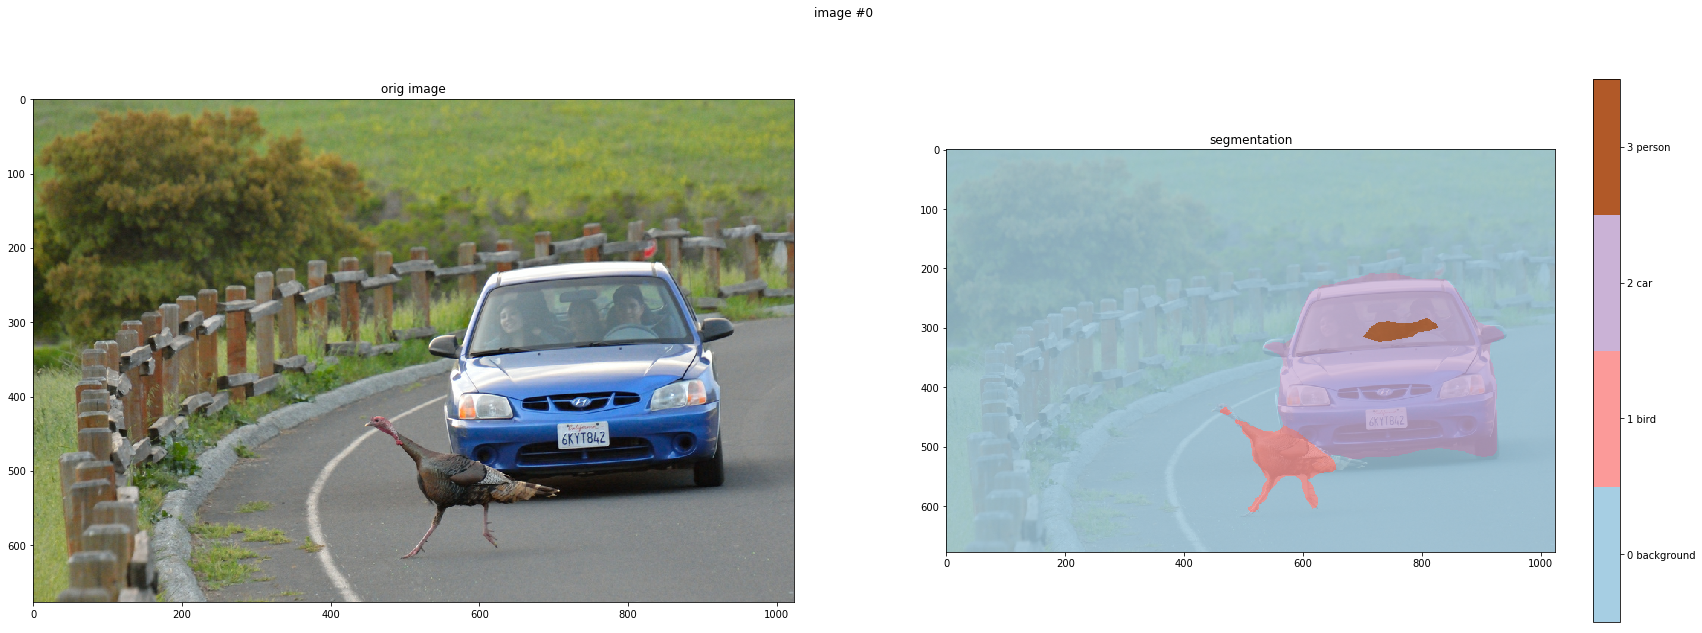

In [6]:
tf.reset_default_graph()
segment_image(fcnfunc_img2labels, checkpoint, 'turkeycar.jpg', pixels=1024)

#### CLI note: same functionality available as:
``` source ~/envs/fresh4seg/bin/activate
python fcn_test.py --traindir=tmp/Apr24_inception_v1__1 --imagepath=turkeycar.jpg.mp4 --pixels=1024
```

### So, what about the actual validation set? 
#### well, let's run the full test, visualizing a few images along the way:

Note we here run the test at "native" resolution of the image, mainly to give nice pictures w.o. ugly margins.
<br>Another option is to rescale long side to *pixels* then pad to square,
<br>using either the values used at train-time (normally 512, usually yielding best mIoU) or a custom value. 

Instructions for updating:
Use the `axis` argument instead
INFO:tensorflow:Restoring parameters from tmp/Apr24_inception_v1__1/fcn.ckpt


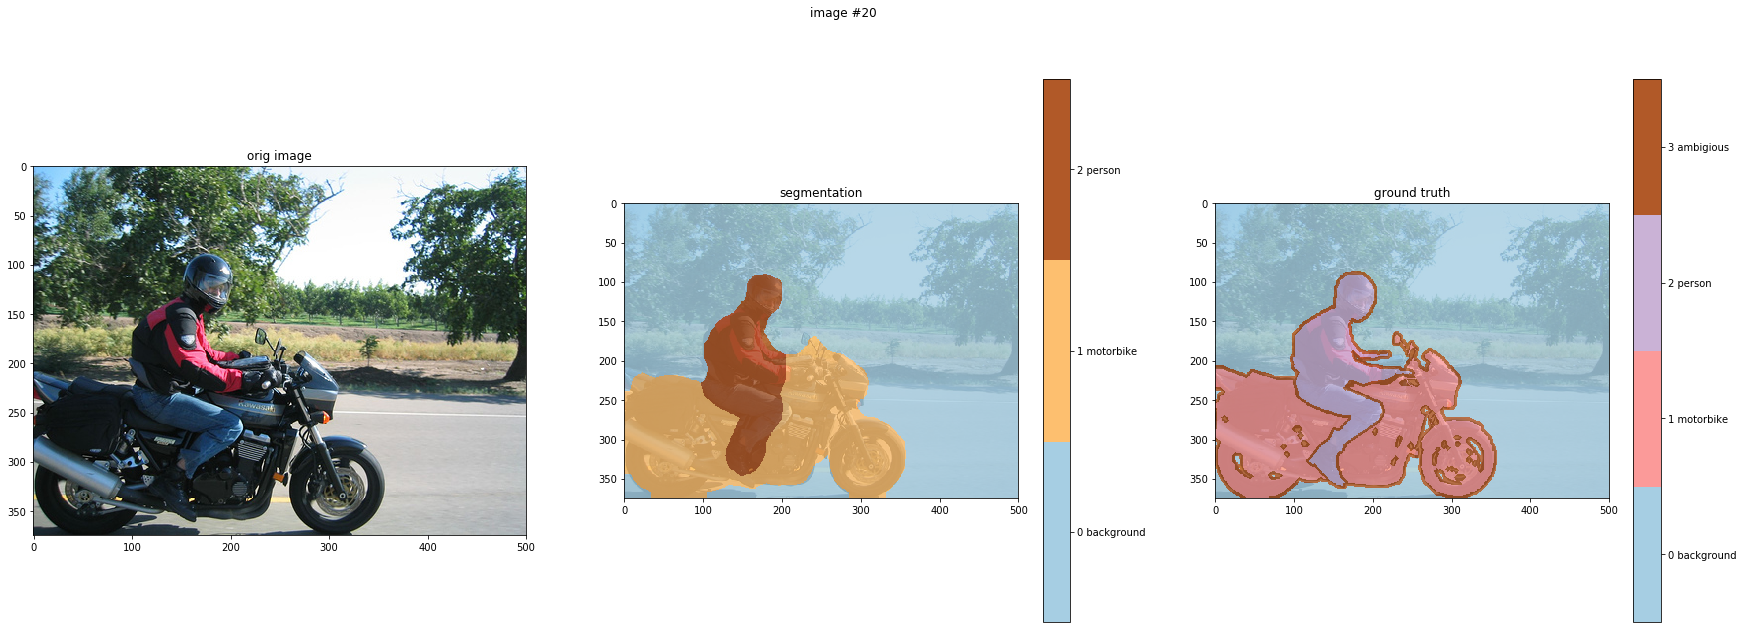

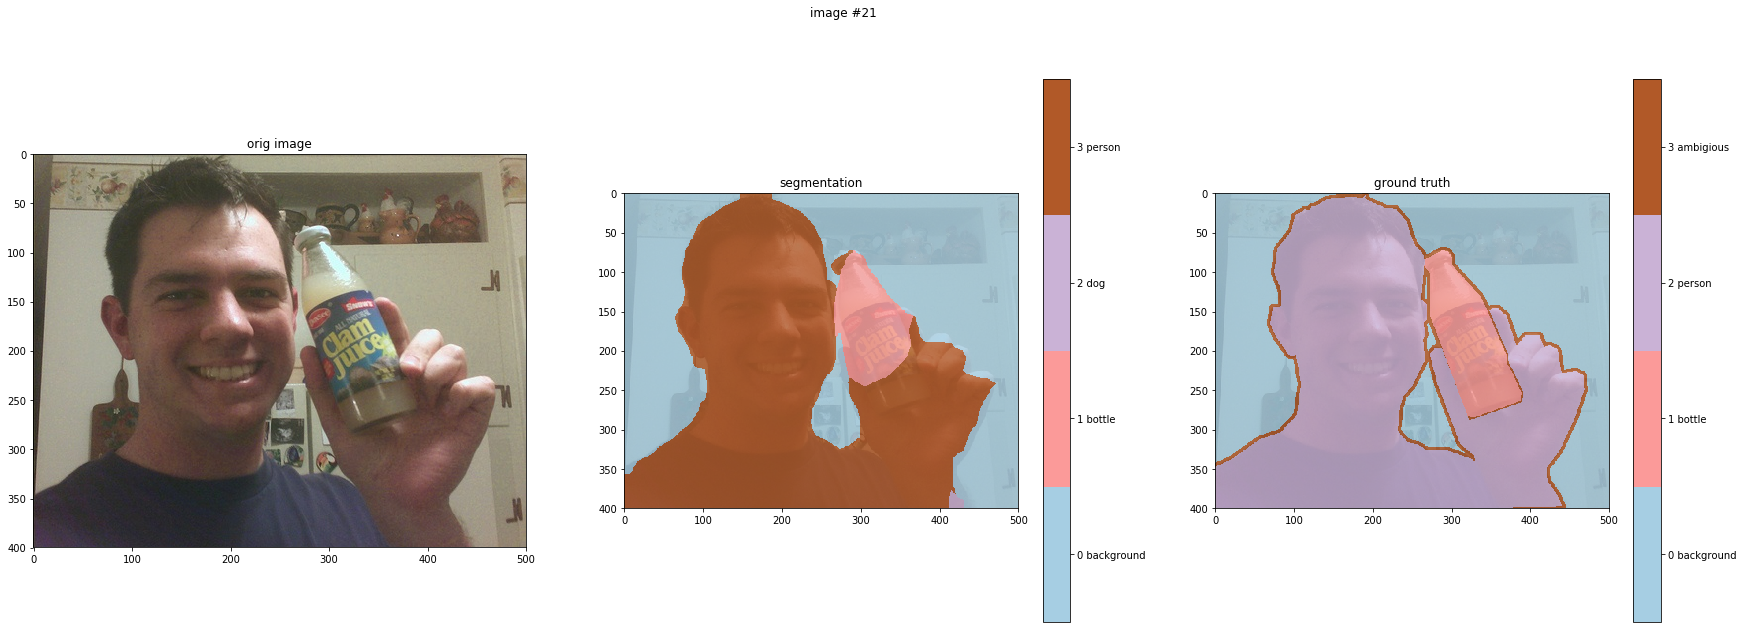

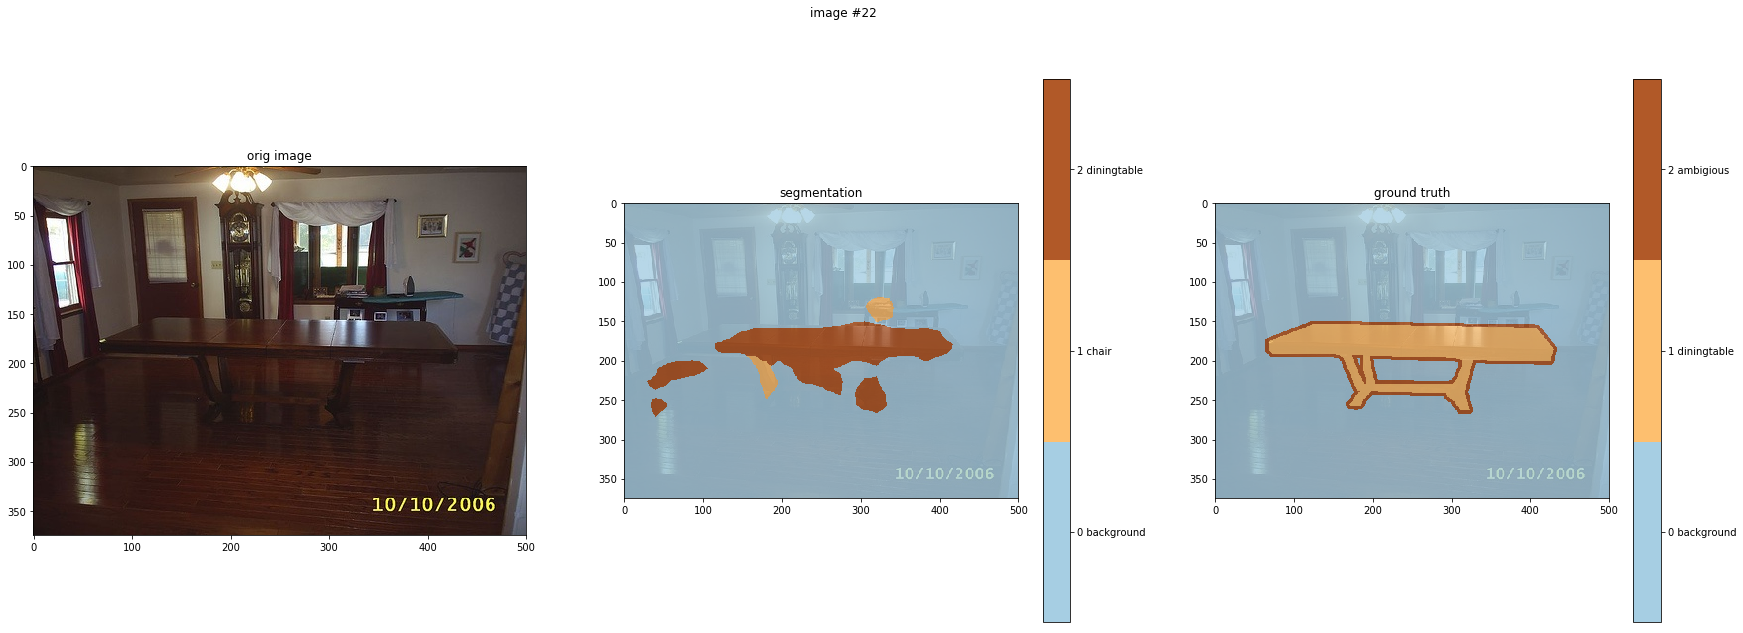

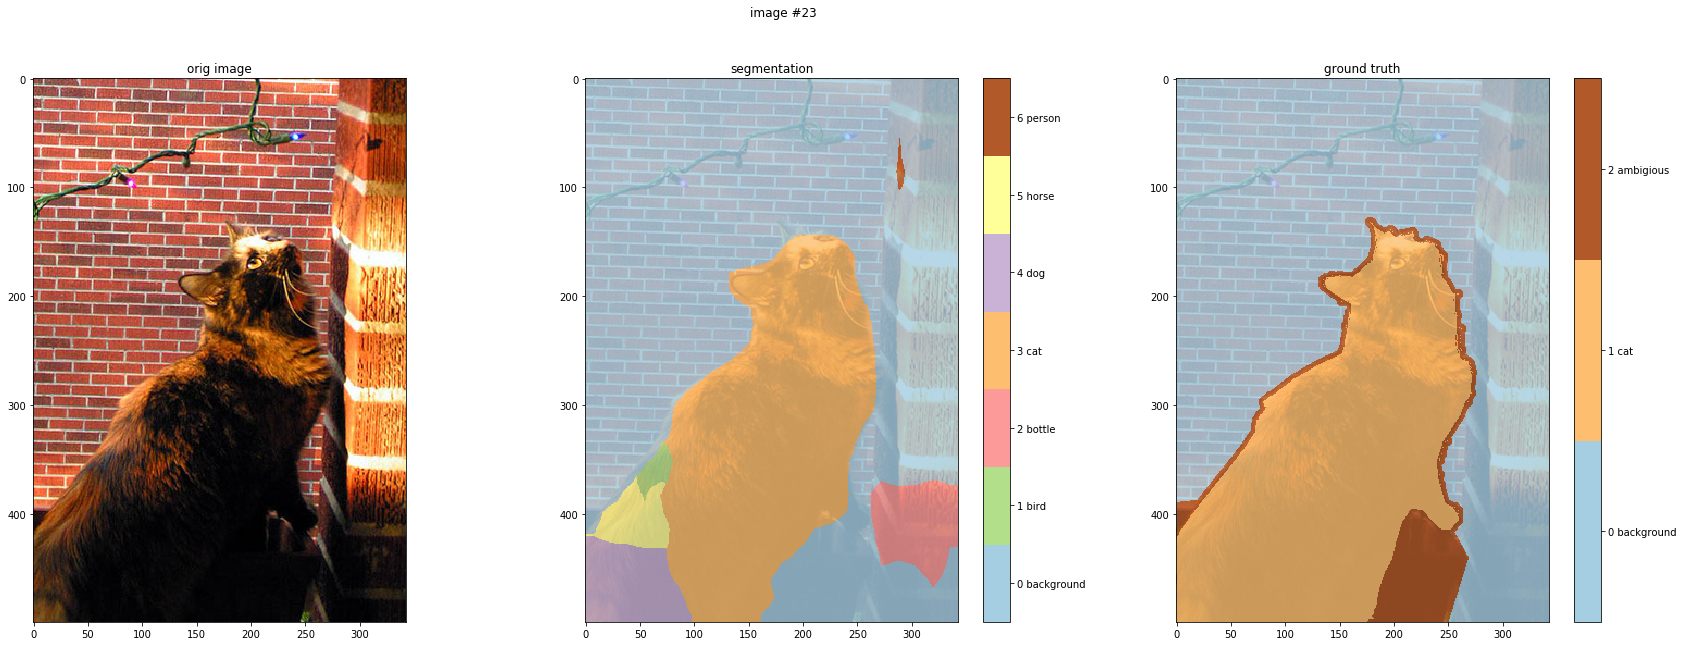

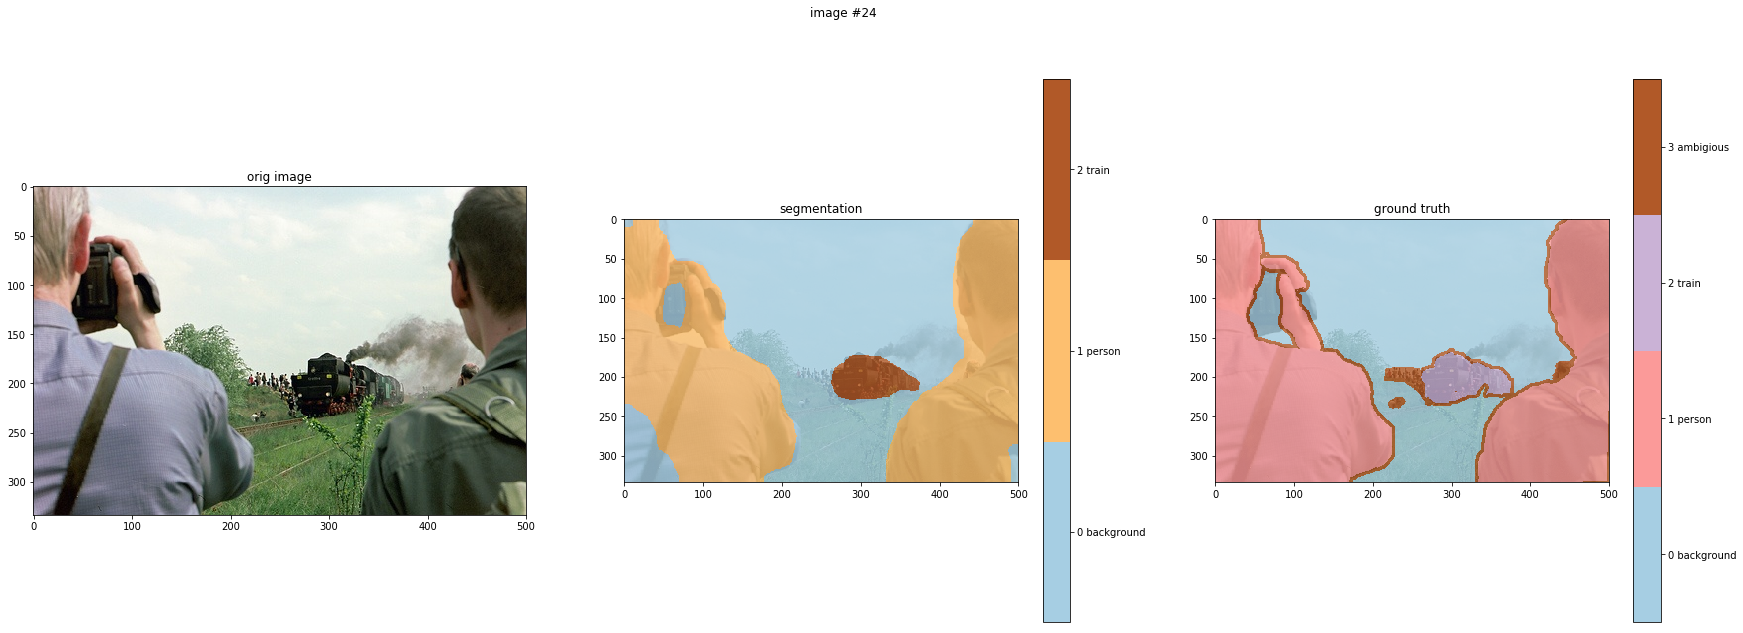

Final mIoU for 904 images is 63.29%


 ---- Breakup by class: ----
background: 91.05%
aeroplane: 76.76%
bicycle: 35.69%
bird: 75.80%
boat: 51.08%
bottle: 73.03%
bus: 75.94%
car: 72.42%
cat: 78.66%
chair: 30.22%
cow: 62.01%
diningtable: 38.63%
dog: 69.81%
horse: 63.20%
motorbike: 70.55%
person: 79.20%
potted-plant: 48.55%
sheep: 68.68%
sofa: 33.05%
train: 72.00%
tv/monitor: 62.83%
0.6329393810755308


In [6]:
tf.reset_default_graph()
iterator = get_data_feed(None)
image, annotation = iterator.get_next()
fcnfunc_img2labels = utils.inference.adapt_network_for_any_size_input(fcn_builder.build_net, 32)
predictions = fcnfunc_img2labels(tf.expand_dims(image, axis=0))
def viz_cb(i, (image_np, upsampled_predictions, annotation_np)):
    if 20 <= i < 25:
        visualize(image_np, annotation_np, upsampled_predictions, i)
scan_val_set(image, annotation, predictions, checkpoint, iterator,
             callback=viz_cb, more_tensors_to_eval=[image, annotation, predictions])

#### CLI note: same functionality available as:
``` source ~/envs/fresh4seg/bin/activate
python fcn_test.py --traindir=tmp/Apr24_inception_v1__1 --first2viz=10 --last2viz=15 --pixels=0
```

check out CLI help on resolution config via *pixels* arg